Enter the sheet no: 1
Enter the the number of order: 3
x:  [0. 1. 2. 3. 4. 5.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.0000e+00 1.5000e+01 5.5000e+01 2.2500e+02 9.7900e+02 4.4250e+03
 2.0515e+04 1.5260e+02 5.8560e+02 2.4888e+03 1.1106e+04]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[6.0000e+00 1.5000e+01 5.5000e+01 2.2500e+02 1.5260e+02]
 [1.5000e+01 5.5000e+01 2.2500e+02 9.7900e+02 5.8560e+02]
 [5.5000e+01 2.2500e+02 9.7900e+02 4.4250e+03 2.4888e+03]
 [2.2500e+02 9.7900e+02 4.4250e+03 2.0515e+04 1.1106e+04]]

a0 =  2.250793650793688

a1 =  3.3994708994707565

a2 =  1.2912698412699148

a3 =  0.07592592592591646
[2.25079365 3.3994709  1.29126984 0.07592593]


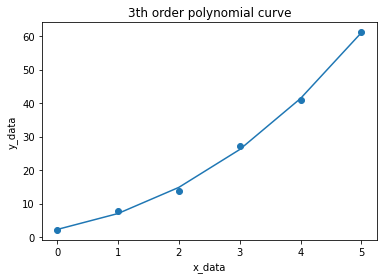

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import math

########################################### User input ##########################################
a = int(input("Enter the sheet no: "))
n = int(input("Enter the the number of order: "))

################################## Storing xlsx data in a matrix ################################
wb = openpyxl.load_workbook(r"C:/Users/tanji/Desktop/new.xlsx")
m = wb['Sheet'+str(a)].max_row - 1

x = np.zeros(m)
y = np.zeros(m)

for i in range(2,m+2):
    x[i-2] = wb['Sheet'+str(a)].cell(i,1).value
    y[i-2] = wb['Sheet'+str(a)].cell(i,2).value
print("x: ",x)
data = np.zeros(3*n+2)
print(data)

################################ getting the ultimate matrix ####################################
for i in range(0,2*n+1):
    for j in range(0,m):
        data[i] += math.pow(x[j],i)
for i in range(2*n+1,3*n+2):
    for j in range(0,m):
        data[i] += (math.pow(x[j],i-(2*n+1)))*y[j]
print(data)


w = np.zeros((n+1,n+2))
print(w)
for i in range(0,n+1):
    for j in range(i,n+1+i):
        w[i,j-i] = data[j]
        w[i,n+1] = data[i+2*n+1]   
print(w)
        
################################ solving with Gauss jordan method ###############################
n += 1
def gauss_jordan(z):
    for j in range(0,n):
        if z[j,j] != 0.0: 
            z[j,:] = z[j,:]/z[j,j]
        for i in range(0,n):
            if i != j:
                if i>j: 
                    z[i,:] = (z[j,:]*z[i,j])-z[i,:]
                else:
                    z[i,:] = z[i,:]-(z[j,:]*z[i,j])
    a = np.zeros(n)
    for i in range(0,n):
        a[i] = w[i,n]
        print('\na'+str(i)+' = ',w[i,n])
    return a

################################# Ploting the polynomial curve ##################################
a = gauss_jordan(w)
print(a)
############# getting the equation #############
def f(z):
    sum = 0
    for i in range(0,n):
        p = a[i]
        p *= math.pow(z,i)
        sum += p
    return sum
############## ploting the curve ##################
y_est = np.zeros(m)
for i in range(0,m):
    y_est[i] = f(x[i])

plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title(str(n-1)+"th order polynomial curve")
plt.plot(x,y_est)
plt.scatter(x,y)
plt.show()